In [1]:
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filePath= 'data/metacritic_games.csv'
outPath= 'output/'
df = pd.read_csv(filePath)

In [3]:
df.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84


In [4]:
df.shape

(5699, 15)

In [5]:
col_names= df.columns.tolist()
col_names

['game',
 'platform',
 'developer',
 'genre',
 'number_players',
 'rating',
 'release_date',
 'positive_critics',
 'neutral_critics',
 'negative_critics',
 'positive_users',
 'neutral_users',
 'negative_users',
 'metascore',
 'user_score']

In [6]:
df.describe()

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
count,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000
mean,13.351816,7.959467,1.146341,28.752062,8.636603,14.374627,71.857694,67.138621
std,16.202234,7.699535,2.926260,103.688270,24.706790,84.938320,11.214583,13.581873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,3.000000,3.000000,0.000000,2.000000,1.000000,0.000000,66.000000,61.000000
50%,8.000000,6.000000,0.000000,5.000000,2.000000,1.000000,73.000000,70.000000
75%,17.000000,10.000000,1.000000,17.000000,6.000000,5.000000,80.000000,76.000000
max,118.000000,65.000000,51.000000,2762.000000,506.000000,2998.000000,97.000000,94.000000


In [7]:
# 2011-2019
# Juegos imprescindibles (binning)
# Relacion entre puntuación de la prensa y de los usuarios

In [8]:
# Miro es estado del data set
null_cols = df.isnull().sum()
null_cols[null_cols>0]

developer           14
genre                5
number_players    2640
rating            1266
dtype: int64

In [9]:
# Para el estudio seleccionado no necesito ciertas columnas.
df_selected = df[['game','platform','developer', 'metascore','user_score']]

In [10]:
df_selected.head()

,game,platform,developer,metascore,user_score
0,Portal 2,PC,Valve Software,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,91,87
4,Super Mario 3D Land,3DS,Nintendo,90,84


In [11]:
null_cols = df_selected.isnull().sum()
null_cols[null_cols>0]

developer    14
dtype: int64

In [12]:
# Visualizar los registros con Developer null
df_dev_null=df_selected[df_selected['developer'].isnull()==True]
df_dev_null

,game,platform,developer,metascore,user_score
258,"Harry Potter and the Deathly Hallows, Part 2",PC,NaN,43,46
620,Cannon Fodder 3,PC,NaN,49,57
1103,Seduce Me,PC,NaN,41,34
1129,Out of the Park Baseball 15,PC,NaN,89,72
1434,Outlast: Whistleblower,PC,NaN,73,79
1562,Dead Nation,VITA,NaN,68,79
1609,Memento Mori 2,PC,NaN,65,75
1727,Dead Rising 3: Operation Broken Eagle,XONE,NaN,52,42
1818,Destiny: The Taken King,PS4,NaN,86,62
1901,3D Fantasy Zone II W,3DS,NaN,81,70


In [13]:
# Se podría buscar información y corregir a mano, pero por tiempo voy a eliminarlos
df_selected = df_selected.drop(df_dev_null.index)

In [14]:
# Comprobación de que no hay nulos
null_cols = df_selected.isnull().sum()
null_cols[null_cols>0]

Series([], dtype: int64)

In [15]:
# Creo columna total_score con la media entre meta y users
df_selected['total_score']=(df_selected['metascore']+df_selected['user_score'])/2
df_selected.head(10)   

,game,platform,developer,metascore,user_score,total_score
0,Portal 2,PC,Valve Software,95,90,92.5
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,94,82,88.0
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,94,90,92.0
3,Batman: Arkham City,PC,Rocksteady Studios,91,87,89.0
4,Super Mario 3D Land,3DS,Nintendo,90,84,87.0
5,Deus Ex: Human Revolution,PC,Nixxes Software,90,85,87.5
6,Pushmo,3DS,Intelligent Systems,90,83,86.5
7,Total War: Shogun 2,PC,Creative Assembly,90,84,87.0
8,FIFA Soccer 12,PC,Electronic Arts,89,71,80.0
9,Battlefield 3,PC,EA DICE,89,76,82.5


In [16]:
# Comprobación de tipos
df_selected.dtypes
# Todos bien.

game            object
platform        object
developer       object
metascore        int64
user_score       int64
total_score    float64
dtype: object

In [17]:
score_labels=['Avoid','For fans','Meh','Recommendable', 'Essential']
cutoffs = [0,60,72,80,89.5,100] #de 0-65 Avoid, de 65 a 75 for fans...
bins = pd.cut(df_selected['total_score'],cutoffs, labels=score_labels)
bins.head(10)

0        Essential
1    Recommendable
2        Essential
3    Recommendable
4    Recommendable
5    Recommendable
6    Recommendable
7    Recommendable
8              Meh
9    Recommendable
Name: total_score, dtype: category
Categories (5, object): [Avoid < For fans < Meh < Recommendable < Essential]

In [18]:
df_selected['category']=bins
df_selected.head()

,game,platform,developer,metascore,user_score,total_score,category
0,Portal 2,PC,Valve Software,95,90,92.5,Essential
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,94,82,88.0,Recommendable
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,94,90,92.0,Essential
3,Batman: Arkham City,PC,Rocksteady Studios,91,87,89.0,Recommendable
4,Super Mario 3D Land,3DS,Nintendo,90,84,87.0,Recommendable


In [19]:
# Cantidad de juegos en cada categoría
df_selected['category'].value_counts()

For fans         2148
Meh              1767
Avoid             973
Recommendable     773
Essential          24
Name: category, dtype: int64

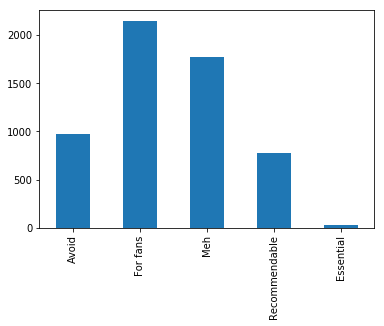

In [20]:
categories = df_selected['category'].value_counts().sort_index()

cat_plot= categories.plot.bar()

In [21]:
fig= cat_plot.get_figure()
fig.savefig(outPath+'cat_plot.png')

In [22]:
# Titulos imprescindibles
df_essentials= df_selected[df_selected['category']=='Essential']
df_essentials

,game,platform,developer,metascore,user_score,total_score,category
0,Portal 2,PC,Valve Software,95,90,92.5,Essential
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,94,90,92.0,Essential
643,BioShock Infinite,PC,Irrational Games,94,86,90.0,Essential
644,Super Mario 3D World,WIIU,Nintendo,93,89,91.0,Essential
645,Fire Emblem: Awakening,3DS,Intelligent Systems,92,91,91.5,Essential
646,Rayman Legends,WIIU,Ubisoft Montpellier,92,88,90.0,Essential
648,The Legend of Zelda: A Link Between Worlds,3DS,Nintendo,91,90,90.5,Essential
1117,Grand Theft Auto V,PS4,Rockstar North,97,83,90.0,Essential
1118,The Last of Us Remastered,PS4,Naughty Dog,95,91,93.0,Essential
1119,Super Smash Bros. for Wii U,WIIU,Bandai Namco Games,92,89,90.5,Essential


In [31]:
df_essen_platform= df_essentials['platform'].value_counts()
df_essen_platform

PS4       7
PC        6
WIIU      4
3DS       3
Switch    2
XONE      2
Name: platform, dtype: int64

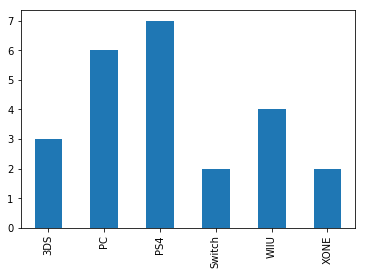

In [35]:
essen_plat_plot= df_essen_platform.sort_index().plot.bar()

In [36]:
fig= essen_plat_plot.get_figure()
fig.savefig(outPath+'essentials_platf_plot.png')

In [23]:
df_selected['dif_score']= df_selected['metascore']-df_selected['user_score']

In [24]:
df_selected.head()

,game,platform,developer,metascore,user_score,total_score,category,dif_score
0,Portal 2,PC,Valve Software,95,90,92.5,Essential,5
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,94,82,88.0,Recommendable,12
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,94,90,92.0,Essential,4
3,Batman: Arkham City,PC,Rocksteady Studios,91,87,89.0,Recommendable,4
4,Super Mario 3D Land,3DS,Nintendo,90,84,87.0,Recommendable,6


In [25]:
#Estudio la relación de diferencia de puntuaciones entre usuarios y prensa.
df_selected['dif_score'].describe()

count    5685.000000
mean        4.714336
std        11.937278
min       -42.000000
25%        -3.000000
50%         3.000000
75%        10.000000
max        70.000000
Name: dif_score, dtype: float64

In [26]:
#A dos desviaciones de la media
# Podemos apreciar que existen ciertos juegos que han obtenido mala puntuación de prensa pero mejor en usuarios.
# el caso mas extremo es Left Alive, proyecto extraño del universo de MGS 
#pero que parece que a los usuarios ha convencido
df_selected[df_selected['dif_score']<-28.5]

,game,platform,developer,metascore,user_score,total_score,category,dif_score
1105,The Chaos Engine (2013),PC,Abstraction Games,40,76,58.0,Avoid,-36
3510,Dead or Alive Xtreme 3: Fortune,PS4,Team Ninja,43,74,58.5,Avoid,-31
4486,Inmates,PC,Iceberg Interactive,46,75,60.5,For fans,-29
5470,Immortal: Unchained,XONE,Toadman Interactive,51,81,66.0,For fans,-30
5504,Senran Kagura Reflexions,Switch,Honey Parade Games,39,75,57.0,Avoid,-36
5514,Past Cure,XONE,Phantom 8,34,69,51.5,Avoid,-35
5698,Left Alive,PS4,"Square Enix, ilinx inc.",37,79,58.0,Avoid,-42


In [27]:
#podemos ver como lo normal es que la prensa valore más que el usuario.
#Debate de prensa comprada.
df_selected[df_selected['dif_score']>28.5].shape

(256, 8)

In [45]:
# A 3 desviaciones estandar.
# Los casos que la dif es mas grande son por micropagos.
users_df=df_selected[df_selected['dif_score']>52.5].sort_values('dif_score', ascending=False)
users_df

,game,platform,developer,metascore,user_score,total_score,category,dif_score
3616,NBA 2K18,XONE,2K Games,85,15,50.0,Avoid,70
4659,FIFA 19,PS4,EA Sports,83,17,50.0,Avoid,66
4665,FIFA 19,XONE,EA Sports,83,20,51.5,Avoid,63
3751,NBA 2K18,PS4,Visual Concepts,80,17,48.5,Avoid,63
751,Company of Heroes 2,PC,Relic,80,21,50.5,Avoid,59
3940,Call of Duty: Infinite Warfare - Sabotage,PS4,Infinity Ward,76,17,46.5,Avoid,59
2592,Out of the Park Baseball 17,PC,Out Of The Park Developments,92,34,63.0,For fans,58
4007,Chime Sharp,XONE,Chilled Mouse,75,17,46.0,Avoid,58
4767,Madden NFL 19,PS4,EA Tiburon,80,23,51.5,Avoid,57
4295,Star Wars Battlefront II,XONE,EA DICE,66,9,37.5,Avoid,57
